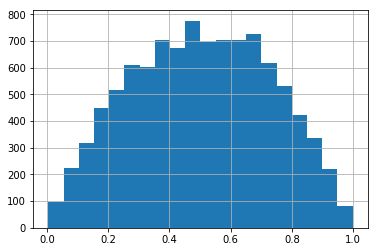

Roots: [ 0.02345504  0.11538267  0.25        0.38461733  0.47654496  0.52345504
  0.61538267  0.75        0.88461733  0.97654496]
Quantiles on Roots: [ 0.08705729  0.21164616  0.32787574  0.42651238  0.48911383  0.52105457
  0.5853229   0.67876993  0.78858168  0.91258802]


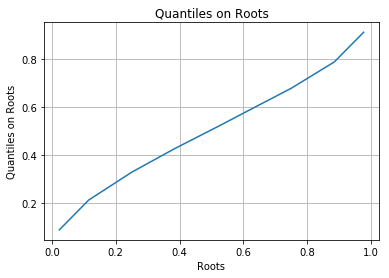

details for i=0,...,2:[-0.00357793 -0.0010503   0.00337393  0.00191791]

sum(details)=0.0006636105597131294,
sum(|details|)=0.009920077975149984


In [3]:
# test for wavelets details

# load pandas
import pandas as pd
# load numpy
import numpy as np
#import math
import matplotlib.pyplot as plt
import polytools as pt
import wavetools as wt

# data location
url='../data/InputParameters.txt'

# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')
Nr=0
Nri=0
No=3
src=1
epsilon=.1

data=dataframe[src]
#q=data.quantile(0.5)
#b=data>=q
#data=data[b]
plt.hist(data,20)
plt.grid(True)
plt.show()
wv=wt.wavetools(No+1)
wv.genWVlets()
r=np.copy(wv.roots)
if Nr>0:
    r=wv.rescY(r,Nr,Nri)
len=r.shape[0]
QuantileOnRoots=np.zeros(len)

for i in range(len):
    QuantileOnRoots[i]=data.quantile(r[i])
print("Roots:",r)
print("Quantiles on Roots:",QuantileOnRoots)
plt.plot(r,QuantileOnRoots)
plt.grid(True)
plt.xlabel("Roots")
plt.ylabel("Quantiles on Roots")
plt.title("Quantiles on Roots")
plt.show()
details=wv.cmpDetails(QuantileOnRoots)
print("details for i=0,...,{}:{}\n".format(No-1,details))
print("sum(details)={},\nsum(|details|)={}".format(sum(details),sum(abs(details))))
